### numerical differential

In [3]:
import numpy as np
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt

#### 2点近似

$$
f^{'}(x_{0})=\frac{f(x_{0}+h)-f(x_{0})}{h}
$$

#### 3点近似（中心差分）

$$
f^{'}(x_{0})=\frac{f(x_{0}+h)-f(x_{0}-h)}{2h}
$$

In [54]:
# hの値は関数のpeak to peakの何％に当たるかを目安にすれば良いと思う
# 今回はf=sin(x)なのでpeak to peak = 2であるから 0.1 / 2 = 5%
h = 1e-1

def numerical_diff_2pnts_approx(f, x):
    return (f(x+h) - f(x)) / h

def numerical_diff_3pnts_approx(f, x):
    return (f(x+h) - f(x-h)) / (2 * h)

In [55]:
def f(x):
    return np.sin(x)

def exact_diff(x):
    return np.cos(x)

In [56]:
data = pd.DataFrame()
freq = 100  # [Hz]
t_range = 3.0 / freq  # [s]
dt = t_range / 1000  # [s]
data['t'] = np.arange(0, t_range + dt, dt)
data['f'] = f(2 * np.pi * freq * data.t)
data['dfdt'] = exact_diff(2 * np.pi * freq * data.t)
data['dfdt2'] = numerical_diff_2pnts_approx(f, 2 * np.pi * freq * data.t)
data['dfdt3'] = numerical_diff_3pnts_approx(f, 2 * np.pi * freq * data.t)

<IPython.core.display.Javascript object>


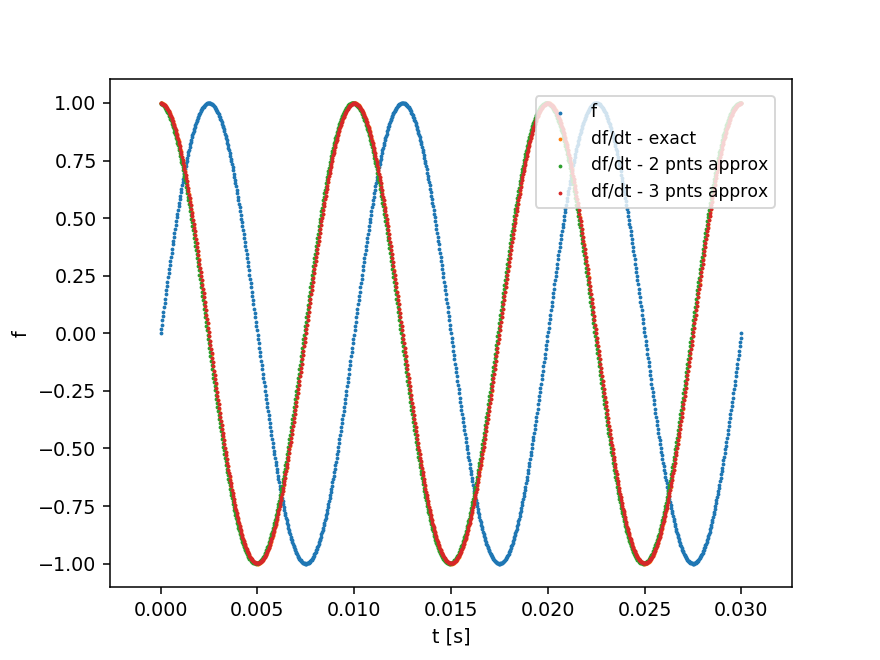

In [61]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(data.t, data.f, s=1, label='f')
ax.scatter(data.t, data.dfdt, s=1, label='df/dt - exact')
ax.scatter(data.t, data.dfdt2, s=1, label='df/dt - 2 pnts approx')
ax.scatter(data.t, data.dfdt3, s=1, label='df/dt - 3 pnts approx')
ax.set_xlabel('t [s]')
ax.set_ylabel('f')
plt.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=1, fontsize=9)
plt.show()

In [59]:
(data.dfdt - data.dfdt2).describe()

count    1001.000000
mean        0.000002
std         0.035346
min        -0.049986
25%        -0.035278
50%         0.000096
75%         0.035278
max         0.049986
dtype: float64

In [60]:
# h=5%の中心差分で十分な精度1std=1.179098e-03/2.0=0.05%が得られている
(data.dfdt - data.dfdt3).describe()

count    1.001000e+03
mean     1.664169e-06
std      1.179098e-03
min     -1.665834e-03
25%     -1.177922e-03
50%     -4.020453e-18
75%      1.177922e-03
max      1.665834e-03
dtype: float64

In [63]:
100*1.179098e-03/2

0.0589549

#### Ref.
- 数値微分(Numerical Differention - Qiita https://qiita.com/jyoshimura/items/a08fc330bcc2b1ca49d8